In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [7]:
data = pd.read_csv('/Users/muhammadzuamaalamin/Documents/labbelajar2new/project/sentimen/tweet.csv')
data

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [8]:
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [11]:
import re
import pandas as pd
import numpy as np
import random
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocessing(text):
    # case folding
    text = text.lower()

    # remove punctuation and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus link menggunakan regex
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
    # Menghapus hashtag menggunakan regex
    text = re.sub(r'#\S+', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # stopword removal
    factory = StopWordRemoverFactory()
    stopwords = factory.get_stop_words()
    words = text.split()
    text = " ".join([word for word in words if word not in stopwords])

    return text

In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
import pandas as pd

# Contoh data
# data = pd.read_csv('tweet.csv')  # kalau sudah ada data csv

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Integrasi tqdm dengan pandas apply
tqdm.pandas(desc="Stemming progress")

# Terapkan stemming dengan progress bar, pastikan input string
data["tweet"] = data["tweet"].astype(str).progress_apply(lambda x: stemmer.stem(x))

print(data)


Stemming progress: 100%|██████████| 1815/1815 [04:52<00:00,  6.20it/s]

     sentimen                                              tweet
0     negatif  kata prabowo indonesia harga bangsa asing beri...
1      netral  batu langka tasbih jokowi hadiah habib luthfi ...
2      netral  era jokowi ekonomi indonesia makin baik indone...
3     positif  sumatera selatan asi games dampak pd ekonomi l...
4     negatif  negara ngutang buat bngun infrastruktur udah d...
...       ...                                                ...
1810   netral  negarawan sejati sll bangga depan harga diri b...
1811   netral  hrs ceramah damai indonesia ekonomi makin baik...
1812   netral  bangun bangsa dgn dukung ekonomi negara sama p...
1813   netral      bantu maju ekonomi bangsa sama pak jokowi yuk
1814   netral  pak jokowi ubah cara pandang ekonomi kini semu...

[1815 rows x 2 columns]


In [13]:
data["tweet"] = data["tweet"].apply(preprocessing)
data

,sentimen,tweet
0,negatif,kata prabowo indonesia harga bangsa asing beri...
1,netral,batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,era jokowi ekonomi indonesia makin baik indone...
3,positif,sumatera selatan asi games dampak pd ekonomi l...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,netral,negarawan sejati sll bangga depan harga diri b...
1811,netral,hrs ceramah damai indonesia ekonomi makin baik...
1812,netral,bangun bangsa dgn dukung ekonomi negara sama p...
1813,netral,bantu maju ekonomi bangsa sama pak jokowi yuk


In [14]:
data

,sentimen,tweet
0,negatif,kata prabowo indonesia harga bangsa asing beri...
1,netral,batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,era jokowi ekonomi indonesia makin baik indone...
3,positif,sumatera selatan asi games dampak pd ekonomi l...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,netral,negarawan sejati sll bangga depan harga diri b...
1811,netral,hrs ceramah damai indonesia ekonomi makin baik...
1812,netral,bangun bangsa dgn dukung ekonomi negara sama p...
1813,netral,bantu maju ekonomi bangsa sama pak jokowi yuk


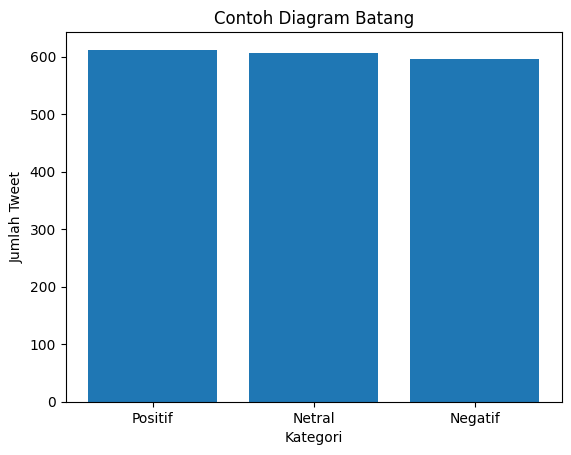

In [15]:
import matplotlib.pyplot as plt

# Data untuk diagram batang
categories = ['Positif', 'Netral', 'Negatif']

# Menghitung jumlah tweet untuk setiap kategori
positif_count = len(data[data['sentimen'] == 'positif'])
netral_count = len(data[data['sentimen'] == 'netral'])
negatif_count = len(data[data['sentimen'] == 'negatif'])

# Nilai untuk setiap kategori
values = [positif_count, netral_count, negatif_count]

# Membuat diagram batang
plt.bar(categories, values)

# Menambahkan judul dan label
plt.title('Contoh Diagram Batang')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tweet')

# Menampilkan diagram
plt.show()

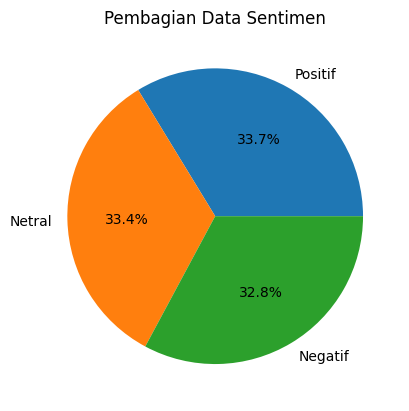

In [16]:
# Membuat diagram pie
plt.pie(values, labels=categories, autopct='%1.1f%%')

# Menambahkan judul
plt.title('Pembagian Data Sentimen')

# Menampilkan diagram
plt.show()

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
# Split parameters
vocab_size = 6000
max_length = 30
trunc_type = 'post'
oov_tok = "<OOV>"

In [19]:
# Tampilkan data dan label
texts = data["tweet"].tolist()
labels = pd.get_dummies(data['sentimen']).values  # Convert labels to categorical

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [21]:
# Menampilkan kamus (word index)
tokenizer.word_index


{'<OOV>': 1,
 'ekonomi': 2,
 'jokowi': 3,
 'prabowo': 4,
 'yg': 5,
 'gaji': 6,
 'pak': 7,
 'harga': 8,
 'presiden': 9,
 'salah': 10,
 'indonesia': 11,
 'jadi': 12,
 'sandi': 13,
 'ambil': 14,
 'rakyat': 15,
 'mau': 16,
 'pilih': 17,
 'negara': 18,
 'gak': 19,
 'kerja': 20,
 'bukan': 21,
 'ga': 22,
 'apa': 23,
 'aja': 24,
 'debat': 25,
 'tak': 26,
 'sama': 27,
 'prabowosandi': 28,
 'sandiuno': 29,
 'kata': 30,
 'pimpin': 31,
 'bangun': 32,
 'buat': 33,
 'baik': 34,
 'tumbuh': 35,
 'kalau': 36,
 'lebih': 37,
 'orang': 38,
 'tdk': 39,
 'makro': 40,
 'janji': 41,
 'nya': 42,
 'perintah': 43,
 'soal': 44,
 'kalo': 45,
 'pajak': 46,
 'naik': 47,
 'prabowosalahkansby': 48,
 'utk': 49,
 'semua': 50,
 'arah': 51,
 'banyak': 52,
 'jelas': 53,
 'tahun': 54,
 'kan': 55,
 'tingkat': 56,
 'satu': 57,
 'game': 58,
 'bilang': 59,
 'tp': 60,
 'nyata': 61,
 'bapak': 62,
 'aku': 63,
 'anak': 64,
 'sangat': 65,
 'hasil': 66,
 'bangsa': 67,
 'turun': 68,
 'pilihorangbaik': 69,
 'cuma': 70,
 'dgn': 71,
 'du

In [22]:
# Menampilkan data teks dan labels
print("Data Teks:")
print(texts[9])  # Menampilkan 5 teks pertama

print("\nLabels:")
print(labels[9])  # Menampilkan 5 label pertama

Data Teks:
prabowosandi sepakat tak ambil gaji negara sedang susah goaceh

Labels:
[ True False False]


In [23]:
# Menampilkan padded sequences
print(padded_sequences[:5])  # Menampilkan 5 contoh pertama


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   30    4   11    8   67  611  399  300   33  249
    55 1645]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 1311 1312 1646    3 1071 2352 2353
     8 2354]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  122    3    2   11  146   34  522 1072
    91 2355]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  752 2356  564  301  262  173    2  164 1073  138  753   11   87
     3  250]
 [   0    0    0    0    0    0   18  957   33 2357   94   92 1313  123
    95  123 1647   18  957   18  957  418   88   45   18  565   66   66
    18   46]]


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Misalkan 'texts' adalah daftar teks yang sudah ada
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)

# Menghitung jumlah kata unik
jumlah_kata = len(tokenizer.word_index)
print("Jumlah kata unik:", jumlah_kata)


Jumlah kata unik: 5891


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a function to create the model
def create_model(embedding_dim, lstm1_dim, lstm2_dim, dense_dim, dropout_rate):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(lstm1_dim, return_sequences=True),
        LSTM(lstm2_dim),
        Dense(dense_dim, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Output layer for multi-class classification
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Define hyperparameter grid
hyperparameter_grid = [
    {'embedding_dim': 32, 'lstm1_dim': 64, 'lstm2_dim': 32, 'dense_dim': 64, 'dropout_rate': 0.2},
    {'embedding_dim': 64, 'lstm1_dim': 128, 'lstm2_dim': 64, 'dense_dim': 128, 'dropout_rate': 0.3},
    {'embedding_dim': 128, 'lstm1_dim': 256, 'lstm2_dim': 128, 'dense_dim': 256, 'dropout_rate': 0.4},
]

# Iterate through the grid and train models
results = []
for params in hyperparameter_grid:
    print(f"Training with parameters: {params}")
    model = create_model(**params)
    history = model.fit(
        X_train, y_train,
        epochs=10,
        validation_data=(X_val, y_val),
        verbose=1
    )
    results.append({
        'params': params,
        'history': history.history
    })

# Print results
for result in results:
    print(f"Parameters: {result['params']}")
    print(f"Final Training Accuracy: {result['history']['accuracy'][-1]}")
    print(f"Final Validation Accuracy: {result['history']['val_accuracy'][-1]}")

Training with parameters: {'embedding_dim': 32, 'lstm1_dim': 64, 'lstm2_dim': 32, 'dense_dim': 64, 'dropout_rate': 0.2}


Epoch 1/10
46/46 [==============================] - 2s 21ms/step - loss: 1.0708 - accuracy: 0.4180 - val_loss: 1.0614 - val_accuracy: 0.4242
Epoch 2/10
46/46 [==============================] - 1s 14ms/step - loss: 0.9680 - accuracy: 0.5014 - val_loss: 0.9594 - val_accuracy: 0.5152
Epoch 3/10
46/46 [==============================] - 1s 14ms/step - loss: 0.7574 - accuracy: 0.6598 - val_loss: 0.9642 - val_accuracy: 0.5565
Epoch 4/10
46/46 [==============================] - 1s 13ms/step - loss: 0.4680 - accuracy: 0.8099 - val_loss: 1.1196 - val_accuracy: 0.5758
Epoch 5/10
46/46 [==============================] - 1s 13ms/step - loss: 0.2456 - accuracy: 0.9146 - val_loss: 1.4579 - val_accuracy: 0.5399
Epoch 6/10
46/46 [==============================] - 1s 13ms/step - loss: 0.1792 - accuracy: 0.9442 - val_loss: 1.5876 - val_accuracy: 0.5813
Epoch 7/10
46/46 [==============================] - 1s 13ms/step - loss: 0.1225 - accuracy: 0.9663 - val_loss: 1.6972 - val_accuracy: 0.5730
Epoch 8/10
46

Epoch 1/10
46/46 [==============================] - 3s 37ms/step - loss: 1.0623 - accuracy: 0.4043 - val_loss: 1.0438 - val_accuracy: 0.4298
Epoch 2/10
46/46 [==============================] - 1s 31ms/step - loss: 0.9437 - accuracy: 0.5193 - val_loss: 0.9611 - val_accuracy: 0.4793
Epoch 3/10
46/46 [==============================] - 2s 36ms/step - loss: 0.7051 - accuracy: 0.6853 - val_loss: 0.9462 - val_accuracy: 0.5537
Epoch 4/10
46/46 [==============================] - 2s 33ms/step - loss: 0.3856 - accuracy: 0.8636 - val_loss: 1.1131 - val_accuracy: 0.5868
Epoch 5/10
46/46 [==============================] - 2s 34ms/step - loss: 0.2055 - accuracy: 0.9346 - val_loss: 1.3868 - val_accuracy: 0.5565
Epoch 6/10
46/46 [==============================] - 2s 33ms/step - loss: 0.1311 - accuracy: 0.9601 - val_loss: 1.4272 - val_accuracy: 0.5647
Epoch 7/10
46/46 [==============================] - 2s 34ms/step - loss: 0.0807 - accuracy: 0.9773 - val_loss: 1.9536 - val_accuracy: 0.5289
Epoch 8/10
46

Epoch 1/10
46/46 [==============================] - 5s 74ms/step - loss: 1.0654 - accuracy: 0.4132 - val_loss: 1.0520 - val_accuracy: 0.4298
Epoch 2/10
46/46 [==============================] - 3s 72ms/step - loss: 0.8886 - accuracy: 0.5764 - val_loss: 0.9283 - val_accuracy: 0.5978
Epoch 3/10
46/46 [==============================] - 4s 82ms/step - loss: 0.4998 - accuracy: 0.8017 - val_loss: 1.0743 - val_accuracy: 0.5868
Epoch 4/10
46/46 [==============================] - 4s 83ms/step - loss: 0.2503 - accuracy: 0.9139 - val_loss: 1.3115 - val_accuracy: 0.5565
Epoch 5/10
46/46 [==============================] - 4s 85ms/step - loss: 0.1275 - accuracy: 0.9594 - val_loss: 1.7523 - val_accuracy: 0.5785
Epoch 6/10
46/46 [==============================] - 4s 91ms/step - loss: 0.0835 - accuracy: 0.9752 - val_loss: 1.7657 - val_accuracy: 0.5647
Epoch 7/10
46/46 [==============================] - 4s 91ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 1.8236 - val_accuracy: 0.5537
Epoch 8/10
46

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Define learning rate
learning_rate = 0.001

# Compile the model with the specified learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 64)            384000    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 540931 (2.06 MB)
Trainable params: 54093

In [37]:
from tensorflow.keras.callbacks import Callback

# YOUR CODE STARTS HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') and logs.get('val_accuracy') > 0.60):
      print('\nReached 56.8% accuracy so cancelling training!')
      self.model.stop_training = True
    
# YOUR CODE ENDS HERE
callbacks=myCallback()



# Use the callback during training
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/10
46/46 [==============================] - 2s 39ms/step - loss: 0.1056 - accuracy: 0.9683 - val_loss: 2.0400 - val_accuracy: 0.4931
Epoch 2/10
46/46 [==============================] - 2s 37ms/step - loss: 0.0668 - accuracy: 0.9814 - val_loss: 2.2795 - val_accuracy: 0.5262
Epoch 3/10
46/46 [==============================] - 2s 37ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 2.4137 - val_accuracy: 0.5317
Epoch 4/10
46/46 [==============================] - 2s 36ms/step - loss: 0.0624 - accuracy: 0.9814 - val_loss: 2.0714 - val_accuracy: 0.5262
Epoch 5/10
46/46 [==============================] - 2s 36ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 2.4315 - val_accuracy: 0.5152
Epoch 6/10
46/46 [==============================] - 2s 36ms/step - loss: 0.0241 - accuracy: 0.9931 - val_loss: 2.5792 - val_accuracy: 0.5344
Epoch 7/10
46/46 [==============================] - 2s 35ms/step - loss: 0.0201 - accuracy: 0.9924 - val_loss: 2.7010 - val_accuracy: 0.5317
Epoch 8/10
46

In [31]:
# Evaluasi model
loss, accuracy = model.evaluate(X_val, y_val)

# Menampilkan hasil evaluasi
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

12/12 [==============================] - 0s 8ms/step - loss: 1.2403 - accuracy: 0.5702
Loss: 1.2402698993682861
Accuracy: 0.5702479481697083


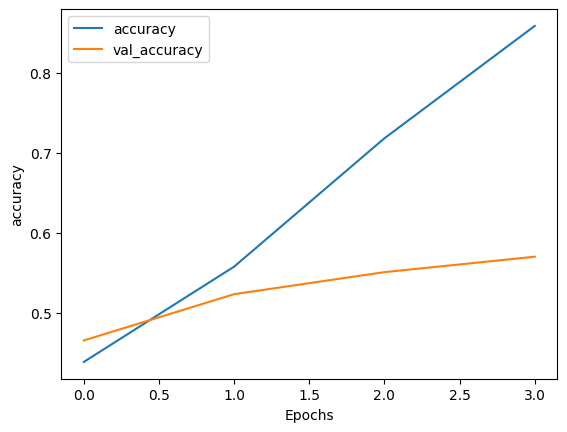

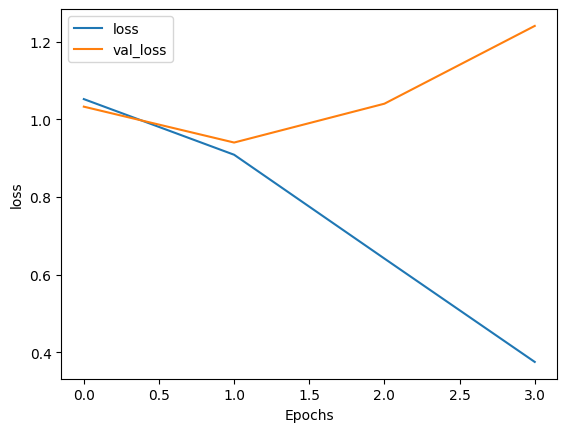

In [32]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Jika X_test dan y_test belum didefinisikan, kita dapat membagi data validasi
X_test, y_test = X_val, y_val  # Menggunakan data validasi sebagai data uji

# Melakukan prediksi
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Mengambil kelas dengan probabilitas tertinggi
y_test_classes = y_test.argmax(axis=1)  # Mengambil kelas sebenarnya

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

12/12 [==============================] - 0s 8ms/step
Confusion Matrix:
[[68 19 28]
 [12 68 38]
 [28 31 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       115
           1       0.58      0.58      0.58       118
           2       0.52      0.55      0.53       130

    accuracy                           0.57       363
   macro avg       0.57      0.57      0.57       363
weighted avg       0.57      0.57      0.57       363



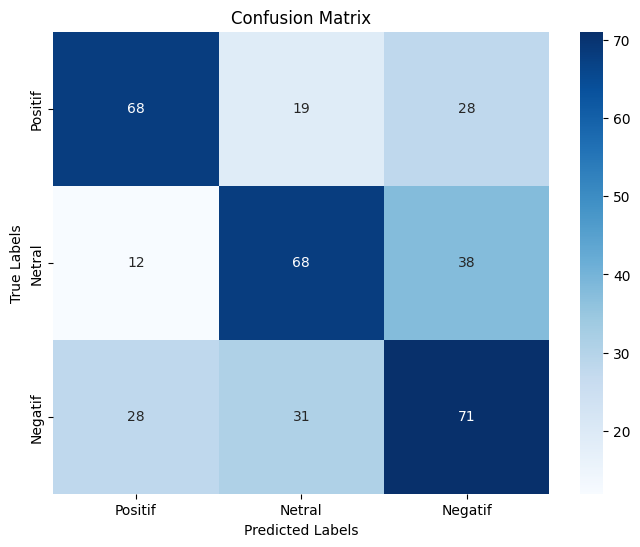

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [35]:
# Save the model to a file
model.save('sentiment_analysis_lstm_model.h5')

print("Model saved successfully!")

Model saved successfully!


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Menampilkan hasil
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.5702479338842975
Precision: 0.5723957856229478
Recall: 0.5702479338842975
F1-Score: 0.5710002918099402
